# Lab 05: Sign Classification with NBC

## Datasets

In [62]:
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.naive_bayes import GaussianNB

### SciKitLearn Digits Dataset

In [9]:
digits = datasets.load_digits()
digits_data = digits.data
digits_split = int(len(digits_data)*0.7)
digits_x_training = digits_data[:digits_split]
digits_x_testing = digits_data[digits_split:]
digits_target = digits.target
digits_y_training = digits_target[:digits_split]
digits_y_testing = digits_target[digits_split:]
print('Training data:', len(digits_x_training), '\nTraining Labels:', len(digits_y_training), '\nTesting Data:', 
      len(digits_x_testing), '\nTesting Labels:', len(digits_y_testing), '\nCheck:', 
      len(digits_data) == len(digits_x_training) + len(digits_x_testing))

Training data: 1257 
Training Labels: 1257 
Testing Data: 540 
Testing Labels: 540 
Check: True


### SciKitLearn Digits Dataset Summarized

In [31]:
digits_summarized = []
for d in digits_data:
    row = []
    for n in d:
        if n < 5:
            row.append(0)
        elif n > 10:
            row.append(2)
        else:
            row.append(1)
    digits_summarized.append(row)
digits_summ_x_training = digits_summarized[:digits_split]
digits_summ_x_testing = digits_summarized[digits_split:]
print('Training data:', len(digits_summ_x_training), '\nTesting Data:', 
      len(digits_summ_x_testing))

Training data: 1257 
Testing Data: 540


### MNIST Light

Training Data: 3500 
Testing Data: 1500 
Training Labels: 3500 
Testing Labels: 1500 
Check: True
(3500, 400)


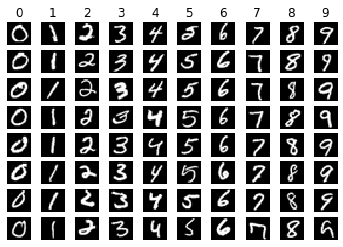

In [112]:
import MNIST
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')
train_features, test_features, train_labels, test_labels = mnist.get_data()
print('Training Data:', len(train_features),'\nTesting Data:', len(test_features), '\nTraining Labels:', 
      len(train_labels), '\nTesting Labels:', len(test_labels), '\nCheck:', 
      int(len(train_features)) == int((len(test_features) + len(train_features))*0.7))
print(train_features.shape)
mnist.visualize_random()

## Classifiers

### Gaussian NB Classifier (SciKitLearn)

#### Digits Dataset

In [26]:
gnb_digits = GaussianNB()
gnb_digits.fit(digits_x_training, digits_y_training)
y_pred_gnb_digits = gnb_digits.predict(digits_x_testing)

In [27]:
print("Classification report SKLearn GNB:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnb_digits)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnb_digits))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix SKLearn GNB:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0  2  0

#### Summarized Digits Dataset

In [32]:
gnb_digits_summ = GaussianNB()
gnb_digits_summ.fit(digits_summ_x_training, digits_y_training)
y_pred_gnb_digits_summ = gnb_digits_summ.predict(digits_summ_x_testing)

In [34]:
print("Classification report SKLearn GNB:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnb_digits_summ)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnb_digits_summ))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.86      0.34      0.49        53
           2       0.97      0.62      0.76        53
           3       1.00      0.19      0.32        53
           4       0.95      0.91      0.93        57
           5       0.94      0.57      0.71        56
           6       0.96      0.96      0.96        54
           7       0.82      0.85      0.84        54
           8       0.31      0.92      0.46        52
           9       0.63      0.78      0.70        55

    accuracy                           0.71       540
   macro avg       0.84      0.71      0.71       540
weighted avg       0.84      0.71      0.71       540


Confusion matrix SKLearn GNB:
[[50  0  0  0  1  0  0  0  2  0]
 [ 0 18  0  0  0  0  0  1 22 12]
 [ 1  0 33  0  0  0  0  0 18  1]
 [ 0  1  0 10  0  0  0  1 34  7]
 [ 0  0  0  0 52  0  1  1  3  0]
 [ 1  2  1

#### MNIST Light Dataset

In [24]:
gnb_mnist = GaussianNB()
gnb_mnist.fit(train_features, train_labels)
y_pred_gnb_mnist = gnb_mnist.predict(test_features)

In [25]:
print("Classification report SKLearn GNB:\n%s\n" % (metrics.classification_report(test_labels, y_pred_gnb_mnist)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred_gnb_mnist))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

### Nearest Centroid Classifier (NCC)

#### Fit function

In [116]:
def NCC_fit(X, Y):
        classes = set(Y)
        class_count = {k: 0 for k in classes}
        classes_dict = {k: np.array([0]*len(X[0])) for k in classes}
        for i in range(len(X)):
            for j in range(len(X[i])):
                classes_dict[Y[i]][j] += X[i][j]
            class_count[Y[i]] += 1
        ncc = []
        for k in classes_dict:
            ncc.append(classes_dict[k]/class_count[k])
        return np.array(ncc)

#### Predict function

In [119]:
def NCC_predict(centroid, X):
    prediction = []
    for x in X:
        temp = []
        for means in centroid:
            distance = np.linalg.norm(np.subtract(means,x))
            temp.append(distance)
            print(distance)
        prediction.append(np.argmin(temp, axis=0))
    return prediction

#### Digits Dataset

In [120]:
ncc_fit_digits = NCC_fit(digits_x_training, digits_y_training)
y_pred_ncc_digits = NCC_predict(ncc_fit_digits, digits_x_testing)

38.93857973783841
42.57169338397843
52.88569856192631
54.88708365966188
20.786208582174
45.89663257619468
39.03544319630112
45.45209205306176
45.14757818730089
48.28349945892489
23.221304700640747
41.78646631987387
44.9116733456405
41.02390989937396
39.75633870493665
37.968983907619545
38.6012585819987
47.34803767845084
35.424251391811374
32.23725050310588
53.171392609184124
52.747315667601626
44.84230810578222
52.26051265948271
55.67128769548318
33.847124929027565
51.87866369512127
44.58767399181079
46.21395942447091
51.33724106338399
50.72787194432662
41.810297960717385
38.22906784780354
28.451977604127958
52.80107540567557
39.51020674951943
58.14401478615758
39.127952565908686
36.364848093099255
39.12891922862169
38.94864557337007
38.394628884674425
41.74782609131494
44.216160798283305
38.80308454810584
40.507407818612904
14.645485139812541
49.227519458124235
34.14855031051236
41.69355249915747
40.51178830908356
48.60894668406744
46.97436173882548
31.734590912047846
50.8481485322438

30.36026677775688
53.35594427804918
41.94829689025462
53.12778087895449
46.09499617095114
39.20010304161876
27.580143581932273
20.743890474064887
45.38389488341404
40.05130197387208
38.69813689076734
44.39760255219795
37.284737835809025
37.79120630980901
44.08270263947073
36.525206384418254
35.87601315642529
53.40633850021924
38.10451060888019
53.26828339273513
44.57171868470943
46.009837827350175
49.549326962827
55.52719840348084
50.66514257356827
43.78590475852599
38.674543565503136
55.11708439313531
43.841949311588984
24.52800274858406
41.943272482114175
57.12650378732781
43.94143930486826
47.39300089879378
53.51086499020549
42.22161143201608
48.22680084766146
45.38948107216032
39.44931307875555
33.75089508197593
21.960971298078547
48.75186033964738
36.17276787588239
45.62231632426715
44.03322236675395
35.10768744616755
32.31705927215532
45.034619927340344
40.437053294347
49.18638366651268
52.37181815898801
21.27247235571996
45.58135158146307
40.48215897911562
39.4145743602541
41.87

41.957315452731244
49.11583239648901
30.95107805260153
42.06286021132096
48.15383632341999
36.44574424638982
45.89092581666234
34.78089572482881
48.25263383484885
38.982663819620235
49.435132446469694
51.195048510573756
35.76636406611252
35.97840323693797
40.95841736032683
46.35210976994326
40.644130280750986
52.56044588091831
31.074952485884832
32.808068976228064
39.107650402446836
43.44574768605093
43.1426362439246
44.260705096154325
49.2887062930986
47.759836171124086
36.72712668063168
47.45003670190326
42.098321486729134
38.847860625713224
45.110445796954835
54.485933891234716
51.65824119906738
60.49868313252803
50.73967904496242
51.66254039557936
50.88682674133325
64.54927067920048
48.598237334290225
52.48536607706971
44.10487864171038
34.23911494183224
36.43088720709052
47.234763880372554
48.36264879859837
26.673691571665774
40.67067809168406
36.19036064319347
39.886597648834375
35.955467170614476
40.31883331645399
47.9667905117697
46.21319243569797
55.64151110047448
47.347727899

46.94950819763717
48.38128762238558
40.532504996612325
42.150770277227195
43.31325555195402
39.20996437044188
43.515469892090714
48.06026890872434
21.604366965963152
37.436839221982204
45.18327478171541
45.09675145728348
33.31701511516486
34.14098401924422
36.821915907842985
42.028047656324574
31.01012521679329
46.39137340410448
35.59242436249602
23.761634867750214
33.89088845102766
48.84994362330421
42.973403619736054
27.15000771334232
42.98380319699627
53.52872622936
41.3397759102587
43.505566649207765
51.408138188423045
40.791660347224955
47.13037576765117
24.349722626756964
44.80777471018503
43.33098812325624
47.0602685472538
37.7444977762711
40.40539716336734
41.29167041915466
43.10337193306342
38.65749832612277
42.51578906712187
49.66339690355464
24.00145845176977
34.09607416805133
43.53609941947857
35.35924411863182
37.06998005821901
37.8879678657515
39.0561220809235
28.04841621632174
43.68469205568468
51.5777955325739
42.3693642986043
30.176262025013788
43.07318939863188
52.424

In [121]:
print("Classification report NCC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_ncc_digits)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_ncc_digits))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.89      0.75      0.82        53
           2       0.98      0.85      0.91        53
           3       0.84      0.77      0.80        53
           4       0.98      0.93      0.95        57
           5       0.86      0.89      0.88        56
           6       0.98      0.96      0.97        54
           7       0.90      0.96      0.93        54
           8       0.80      0.75      0.77        52
           9       0.65      0.87      0.74        55

    accuracy                           0.87       540
   macro avg       0.88      0.87      0.88       540
weighted avg       0.88      0.87      0.88       540


Confusion matrix NCC:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  0  0  1  0  0  0 12]
 [ 1  0 45  6  0  0  0  0  0  1]
 [ 0  1  0 41  0  2  0  3  5  1]
 [ 1  0  0  0 53  0  0  0  3  0]
 [ 0  0  0  0  0 50  1  0 

#### Summarized Digits Dataset

In [122]:
ncc_fit_digits_summ = NCC_fit(digits_summ_x_training, digits_y_training)
y_pred_ncc_digits_summ = NCC_predict(ncc_fit_digits_summ, digits_summ_x_testing)

5.5959070757116764
6.049273867172231
7.533686919803553
7.692469229073113
3.138278241740309
6.319274685617027
5.608455305121172
6.690884545409523
6.448548770196417
6.8273942320624785
3.9711680901215956
6.196766565753505
6.816605902131498
6.056548121490408
6.208247635982107
5.918485502856137
5.981438418575511
7.020536731618174
5.2551468225776174
5.09561694007703
7.608033648716336
7.360900869246548
6.494289294782672
7.330983127075622
7.921617014791377
5.002846254635282
7.340833861059897
6.4280584938222205
6.643881267059342
7.0448074494623345
7.024113894293002
5.890202841486134
5.23773404827487
4.181121278787425
7.488297321433862
5.656564736284049
8.131670323379108
5.799994482755997
5.266053762088673
5.684831747730095
5.776692479265276
5.808033161387236
6.194299139646518
6.524881825767934
6.046359875324614
6.01953651487118
2.5250803456645703
7.2954736652255825
5.082291105490317
6.097648071182856
5.534092156804041
6.66507101870595
6.565917857793879
4.547721973464186
7.092277717757988
5.1636

7.453755277840525
5.64673476485846
6.127745025579817
7.354993949691597
5.664978196155144
6.474975830070719
6.003513637862414
5.969943546463388
5.106762110259341
3.081746219810063
7.182668432167227
5.554625772535454
6.702776428796033
6.583003569800034
5.300186596990072
4.434107802027371
6.376376400433086
5.923667643534758
6.912936906274733
7.526686250745395
3.5664769821935103
6.220541561165309
5.4662571984801005
6.28648836792052
6.1559123329883265
7.134515540665673
5.7773848755297585
6.3200119880705286
5.848764955855634
4.586460650847792
6.9556486676008
4.001574394116052
6.479984875013827
6.622381444767433
5.528778147021163
4.2015844630329635
5.51744288597535
6.4972201254700135
6.246159069520098
6.235525250364158
6.196545603750112
5.973212226123556
3.4887399362252105
7.253684305234135
5.428538214219466
5.869012864187639
6.711346809694757
5.792663863036625
6.949006883730601
6.3237225947713185
5.46635604284031
5.56319203049411
7.2940251168751
4.106572293287919
5.672208139342909
5.68694223

5.006926402494848
6.480908578278203
5.0336766251483125
5.660985884655102
5.426878100451471
6.308756075947654
4.844885457052903
6.470256542706746
5.280902953094291
4.106393766578149
5.205123629655688
6.516607706468144
4.46223528933843
6.5573145486159286
6.998148529449535
2.5068454666270092
6.065507019979701
5.614068314112865
5.450865619330567
5.28159603258691
6.1894516719980945
5.5506914884543885
6.430058499310018
6.525260090661554
5.128075639390824
6.87752886041247
5.800648090219393
7.898846674265653
5.758466462522813
6.133234719692996
5.352878851608731
2.574135971544627
6.677852523083516
6.02936255330259
5.3856152917754825
6.196545603750112
5.396638652231254
6.36968454052179
6.4187176289349255
5.396736499789395
5.0427484569429
6.882599508906501
5.573740444002317
6.7726908855657655
6.503626662356443
5.7678544677627155
5.3760102790577085
7.015032175361196
5.0762127614984776
5.317170848464967
5.800457912958252
4.174467151625462
6.115547062237399
5.652431953833316
3.9561352248324075
6.781

6.067968085478905
5.907383297142215
5.737365208561083
5.308406574327245
6.78468392778912
5.401291065664574
5.208196616872293
6.467934446173678
3.0494492415257595
5.3368759641977865
6.368571128977996
4.81868841745512
5.867307393033339
5.848316202600952
5.189984200361308
3.8231620586691877
5.9029917838330075
6.410785911259243
4.903399506786456
4.043910582489126
5.547439304781683
6.108725911191672
5.733213801070749
5.887231549632699
5.673088753051551
4.7436077017905856
6.550519979360417
6.999012501774804
4.42122185511493
5.283723017740407
4.861648002660738
6.299801584177076
4.905121474465673
6.837688462336305
5.525933043387334
4.538741530889887
5.821109172657733
5.570832612814713
6.0100620714763515
7.089177569056875
7.527708185931783
3.323001460980332
6.30670297330943
5.518584139934973
6.278211210209482
6.325346690087306
6.756131437442584
6.063182002876048
5.857208602621775
6.634342704575049
5.3741766948928085
5.80409338312195
3.8622997729859283
6.222739545005471
5.622093560231812
5.29863

In [123]:
print("Classification report NCC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_ncc_digits_summ)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_ncc_digits_summ))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.81      0.66      0.73        53
           2       0.96      0.81      0.88        53
           3       0.76      0.77      0.77        53
           4       0.96      0.93      0.95        57
           5       0.88      0.89      0.88        56
           6       0.96      0.94      0.95        54
           7       0.88      0.94      0.91        54
           8       0.76      0.79      0.77        52
           9       0.66      0.82      0.73        55

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540


Confusion matrix NCC:
[[51  0  0  0  1  1  0  0  0  0]
 [ 0 35  0  1  0  1  0  0  4 12]
 [ 1  1 43  7  0  0  0  0  0  1]
 [ 0  2  1 41  0  2  0  3  4  0]
 [ 1  0  0  0 53  0  0  0  3  0]
 [ 0  0  0  0  0 50  2  0 

#### MNIST Light Dataset

In [ ]:
ncc_fit_mnist = NCC_fit(train_features, train_labels)
y_pred_ncc_mnist = NCC_predict(ncc_fit_mnist, test_features)

In [113]:
print("Classification report NCC:\n%s\n" % (metrics.classification_report(test_labels, y_pred_ncc_mnist)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(test_labels, y_pred_ncc_mnist))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.35      0.99      0.51       164
           1       0.94      0.88      0.90       152
           2       0.65      0.79      0.72       155
           3       0.62      0.66      0.64       154
           4       0.89      0.52      0.65       143
           5       0.00      0.00      0.00       141
           6       0.84      0.76      0.80       143
           7       0.74      0.78      0.76       158
           8       0.45      0.42      0.43       132
           9       0.77      0.17      0.28       158

    accuracy                           0.61      1500
   macro avg       0.62      0.60      0.57      1500
weighted avg       0.63      0.61      0.57      1500


Confusion matrix NCC:
[[162   0   1   0   0   0   1   0   0   0]
 [  0 133   3   3   0   0   0   0  13   0]
 [ 17   1 123   8   1   0   2   0   3   0]
 [ 35   0   6 102   0   1   1   2   7   0]
 [ 27   2   9   0  

### NB Classifier

#### Digits Dataset

#### Summarized Digits Dataset

### Own Gaussian NB Classifier

#### Digits Dataset

#### Summarized Digits Dataset

#### MNIST Light Dataset